# A code example

In [1]:
import numpy as np
import simbinary as sim
import matplotlib.pyplot as plt
from astropy.time import Time
import pandas as pd
import numpy as np

root = '/Users/esivkova/phd/code/gaia_sim/'
plot_dir = '/Users/esivkova/phd/code/gaia_sim/plots/' # optional
data_dir = '/Users/esivkova/phd/code/gaia_sim/simDR4/' # optional
fit_dir = '/Users/esivkova/phd/code/gaia_sim/notebook_fit/' # optional

In [2]:
params = {'Object': 'V1334 Cyg', #simbad resolved name
# 'id3': 11111..., if no gaia resolved name, write gaia dr3 id here
 'type': 'cepheid', # can be 'binary' or 'BH'
 'P': 1932.8,
 'a': 8.54,
 'e': 0.233,
 'i': 124.94,
 'Omega': 213.17,
 'w': 229.8,
 'T0': 2453316.75,
 'q': 0.942,
 'pll': 1.388,
 'Vcomp': 7.99 # mandatory for types cepheid and binary
}

In [3]:
sb = sim.SimBinary(params, DataRelease = 4) # DataRelease from 1 to 5

w_bs = sb.SimDR4() # simulated along scan points
sim_astrometry = sb.get_dataframe(data_dir) # a dataframe

Gaia DR3 ID added with Simbad
RA/DEC coordinates added with Gaia DR3
Proper motion RA/DEC added with Gaia DR3
Gmag added with Gaia DR3
Applying correction for DR3 proper motion...
The p1_o period used
Vector: 1.569403613253479 2.6172543698023345
Proper motion corrected to: 0.7233717813236971                   and -2.3917232705427907 mas
The p1_o period used


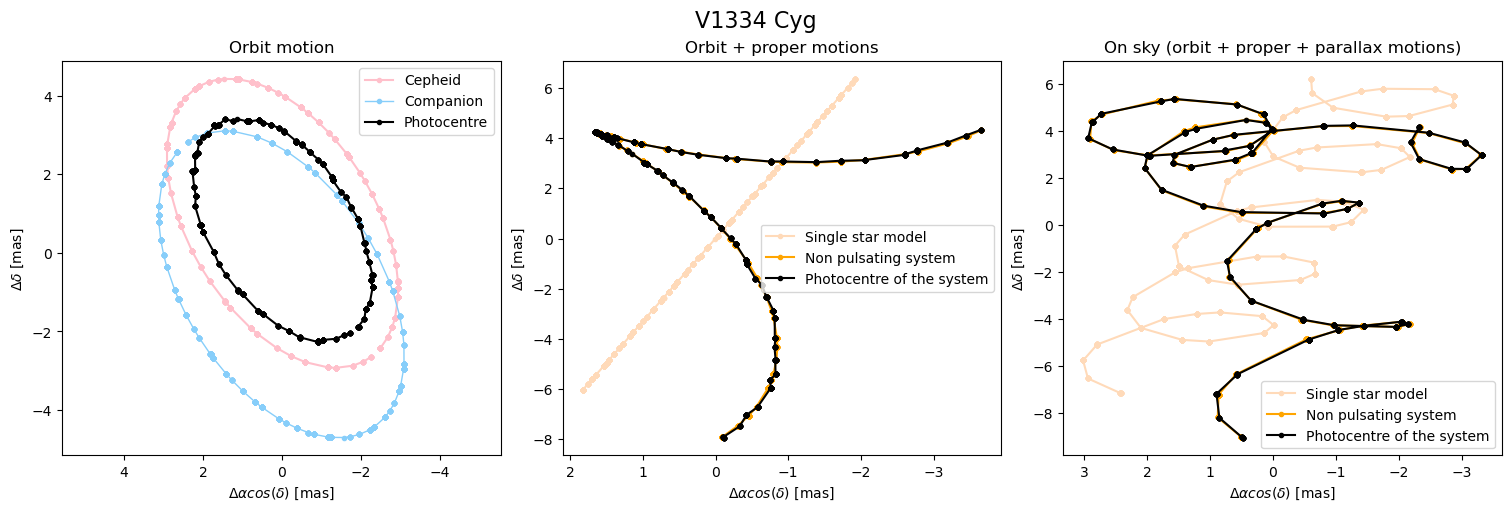

In [4]:
sb.PlotSim(plot_dir) # plot. plot_dir is optional

In [5]:
nt = sim.notebookDR4(params['Object'], sb.id3) # initialize fitting
nt.load_dataframe(sim_astrometry) # give data to fit
fit_parameters = nt.fitthething(fit_dir) # fit. fit_dir is optional

SS model
Parameter                        Value     Error       
lin.ra                       -0.072575  ±  0.000800    
lin.dec                       0.892938  ±  0.000943    
lin.parallax                   1.39859  ±  0.00117     
lin.mura                      0.070174  ±  0.000517    
lin.mudec                    -2.066979  ±  0.000618    
BS model
Parameter                        Value     Error       
lin.ra                        -0.01266  ±  0.00318     
lin.dec                       -0.02904  ±  0.00376     
lin.parallax                   1.38961  ±  0.00125     
lin.mura                       0.71225  ±  0.00261     
lin.mudec                     -2.39687  ±  0.00225     
kep.0.P                        1924.88  ±  2.32        
kep.0.Tp                       -756.59  ±  1.09        
kep.0.as                       3.19508  ±  0.00275     
kep.0.e                        0.24233  ±  0.00124     
kep.0.w [deg]                  228.521  ±  0.282       
kep.0.i [deg]                 

Text(0, 0.5, 'Along scan, [mas]')

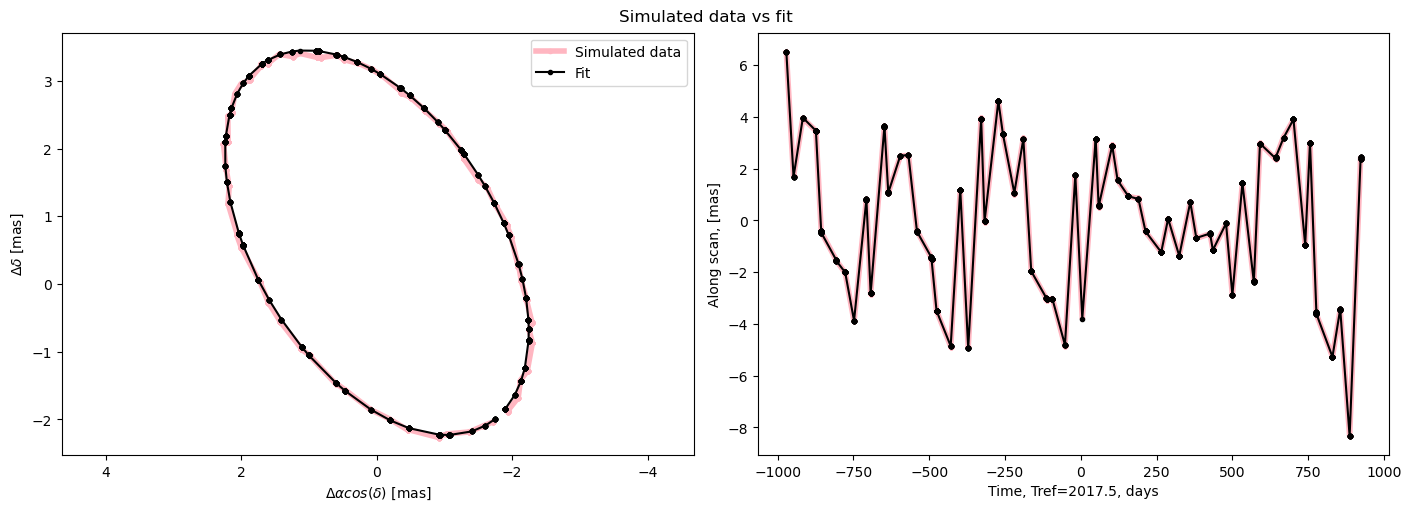

In [6]:
w_fit = nt.keplerian_model.model() # fitted along scan
ra_fit, dec_fit = sim.orbit2(fit_parameters, sb.reltimes.value) # fitted
ra_ph, dec_ph = sb.ra_ph, sb.dec_ph # sim data

fig, axs = plt.subplots(1,2, figsize=(14, 5), constrained_layout=True)
ax1, ax2 = axs
fig.suptitle('Simulated data vs fit')
ax1.plot(ra_ph, dec_ph, label = 'Simulated data', marker='.', lw = 4, color='lightpink')
ax1.plot(ra_fit, dec_fit, label = 'Fit', marker='.', color = 'black')
ax1.set_aspect('equal', adjustable='datalim')
ax1.xaxis.set_inverted(True)
ax1.set_xlabel(r'$\Delta \alpha cos(\delta)$ [mas]')
ax1.set_ylabel(r'$\Delta \delta$ [mas]')
ax1.legend()

ax2.plot(sb.reltimes.value, w_bs, marker='.', lw = 4, color='lightpink')
ax2.plot(sb.reltimes.value, w_fit, marker='.', color = 'black')
ax2.set_xlabel(f'Time, Tref={sb.Tref}, days')
ax2.set_ylabel('Along scan, [mas]')